<a href="https://colab.research.google.com/github/curiosity806/machine-learning-and-practice-report/blob/master/Dacon_satellite_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# 훈련 데이터
!cp '/content/drive/My Drive/2020 Kaggle Study/deagwon/train_real.npy' train.npy

In [1]:
import numpy as np

train = np.load('train.npy')

In [4]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Conv2DTranspose, MaxPooling2D, BatchNormalization, Activation, concatenate, Input, GlobalAveragePooling2D
from tensorflow.keras import Model
import warnings
import gc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

warnings.filterwarnings("ignore")

# 재생산성을 위해 시드 고정
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## high leverage point
채널 별 히스토그램을 그려 분포 확인

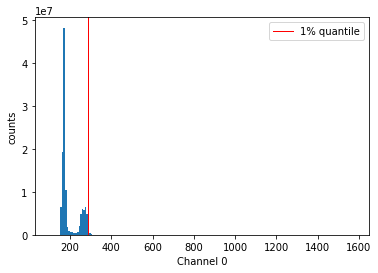

In [39]:
i=0
plt.hist(train[:,:,:,i].reshape(-1), bins = 200)
plt.axvline(x = np.quantile(train[:,:,:,i].reshape(-1), .99), linewidth=1, color='r', label='1% quantile')
plt.legend()
plt.ylabel('counts')
plt.xlabel('Channel {}'.format(i))
plt.show()

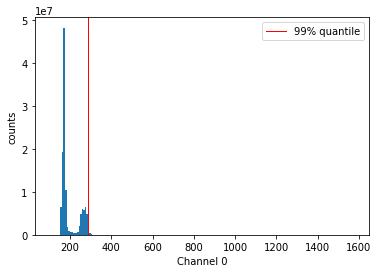

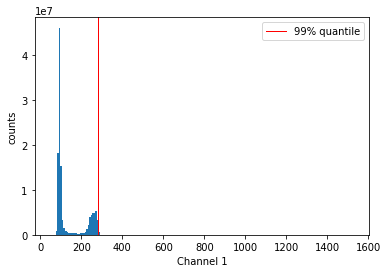

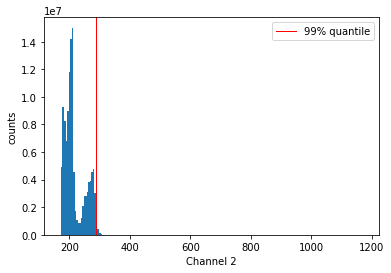

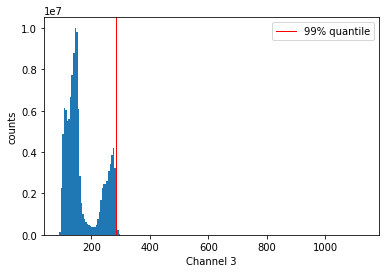

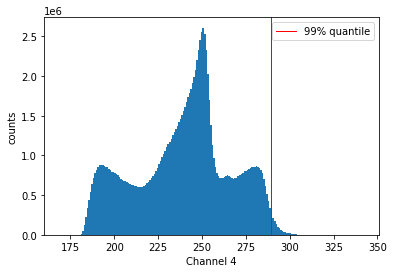

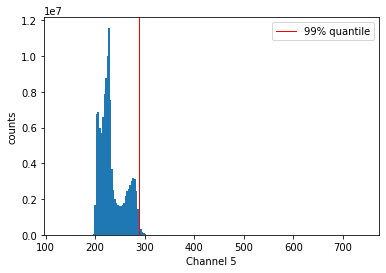

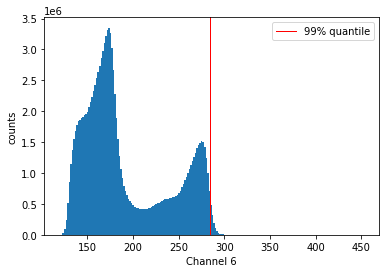

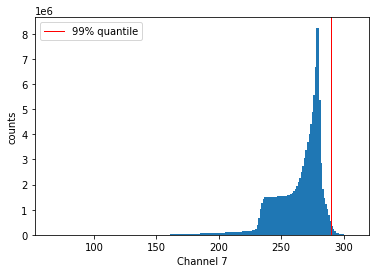

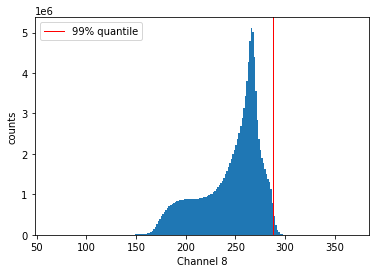

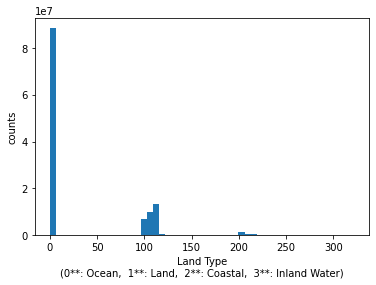

38032

In [41]:
for i in range(9):
    plt.hist(train[:,:,:,i].reshape(-1), bins = 200)
    plt.axvline(x = np.quantile(train[:,:,:,i].reshape(-1), .99), linewidth=1, color='r', label='99% quantile')
    plt.legend()
    plt.ylabel('counts')
    plt.xlabel('Channel {}'.format(i))
    plt.show()

plt.hist(train[:,:,:,9].reshape(-1), bins = 50)
plt.ylabel('counts')
plt.xlabel('Land Type\n(0**: Ocean,  1**: Land,  2**: Coastal,  3**: Inland Water)')
plt.show()

gc.collect()

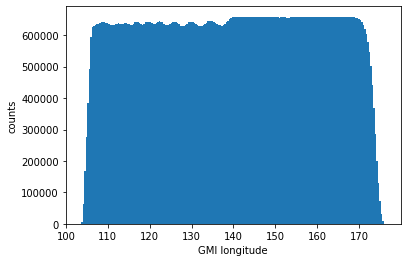

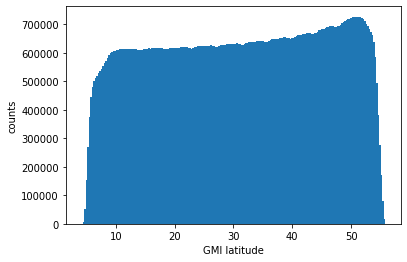

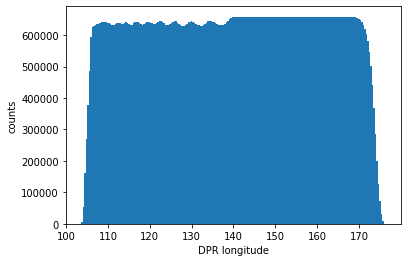

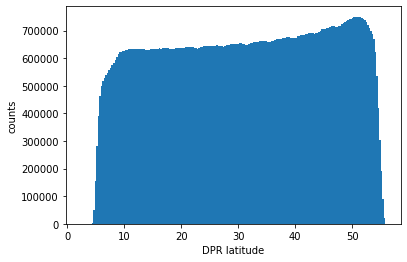

15949

In [ ]:
plt.hist(train[:,:,:,10].reshape(-1), bins = 200)
plt.ylabel('counts')
plt.xlabel('GMI longitude')
plt.show()

plt.hist(train[:,:,:,11].reshape(-1), bins = 200)
plt.ylabel('counts')
plt.xlabel('GMI latitude')
plt.show()

plt.hist(train[:,:,:,12].reshape(-1), bins = 200)
plt.ylabel('counts')
plt.xlabel('DPR longitude')
plt.show()

plt.hist(train[:,:,:,13].reshape(-1), bins = 200)
plt.ylabel('counts')
plt.xlabel('DPR latitude')
plt.show()

gc.collect()

In [2]:
np.sum(train[:,:,:,-1].reshape(-1) < 0)

543756

In [ ]:
print('결측값의 비율:', 543756/train.reshape(-1).shape[0]*100, '%')

결측값의 비율: 0.02967646866199489 %


In [3]:
train[:,:,:,-1].reshape(-1)[train[:,:,:,-1].reshape(-1) < 0] = -1

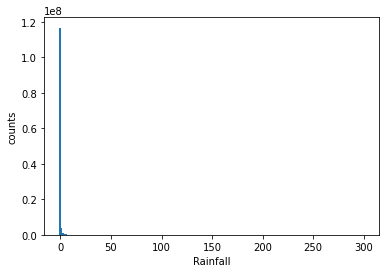

In [5]:
# 결측값 제외한 Target(강수량) 분포 시각화

plt.hist(train[:,:,:,-1].reshape(-1), bins = 200)
plt.ylim()
plt.ylabel('counts')
plt.xlabel('Rainfall')
plt.show()

In [16]:
np.sum(train[:,:,:,-1].reshape(-1) == 0) / train[:,:,:,-1].reshape(-1).shape[0] * 100

92.83886796777784

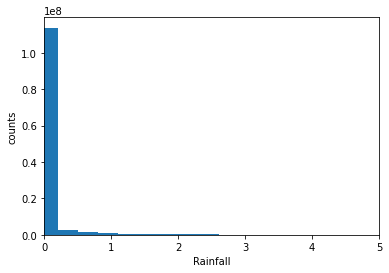

In [21]:
# 결측값 제외한 Target(강수량) 분포 시각화

plt.hist(train[:,:,:,-1].reshape(-1), bins = 1000)
plt.ylabel('counts')
plt.xlabel('Rainfall')
plt.xlim(0, 5)
plt.show()

In [21]:
def outlier(data, channel):
    x = data[:,:,:,channel].reshape(-1)
    q99 = np.quantile(x, .99)
    q995 = np.quantile(x, .995)
    q999 = np.quantile(x, .999)
    q9999 = np.quantile(x, .9999)
    print('1%:', q99, '\n0.5%:', q995, '\n0.1%', q999, '\n0.01%', q9999)

In [28]:
for i in range(14):
    print(i)
    outlier(train, i)

0
1%: 288.49365234375 
0.5%: 292.1386109924315 
0.1% 300.23187261962903 
0.01% 343.91686407775796
1
1%: 282.1341247558594 
0.5%: 284.7510070800781 
0.1% 294.6739807128906 
0.01% 481.45509247738937
2
1%: 289.1573181152344 
0.5%: 292.2474365234375 
0.1% 299.05261233520514 
0.01% 305.54607544250484
3
1%: 284.2022402954103 
0.5%: 286.3955993652344 
0.1% 290.4615783691406 
0.01% 295.22819214782703
4
1%: 289.43011474609375 
0.5%: 291.91241455078125 
0.1% 297.57928472900403 
0.01% 303.32353516235344
5
1%: 288.213134765625 
0.5%: 291.1036376953125 
0.1% 297.6339111328125 
0.01% 304.21281738891594
6
1%: 284.3915100097656 
0.5%: 286.6398620605469 
0.1% 291.234375 
0.01% 297.23833008422844
7
1%: 289.4615173339844 
0.5%: 291.29470840454087 
0.1% 295.3923034973145 
0.01% 300.64605105895953
8
1%: 287.79840087890625 
0.5%: 289.4349060058594 
0.1% 292.79003909301764 
0.01% 297.1440673858642
9
1%: 206.0 
0.5%: 212.0 
0.1% 300.0 
0.01% 300.0
10
1%: 173.2702943420411 
0.5%: 173.87850952148438 
0.1% 174.8

In [27]:
print('강수량이 299.xx인 데이터 갯수: ', np.sum(train[:,:,:,-1].reshape(-1) > 299))

강수량이 299.xx인 데이터 갯수:  1259
